# Iris Flower Classification using Custom CSV Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)



IRIS FLOWER CLASSIFICATION

✓ Successfully loaded Iris.csv

1. DATASET OVERVIEW
------------------------------------------------------------
Dataset shape: (150, 6)
Number of samples: 150
Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

2. DATA INFORMATION
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  --

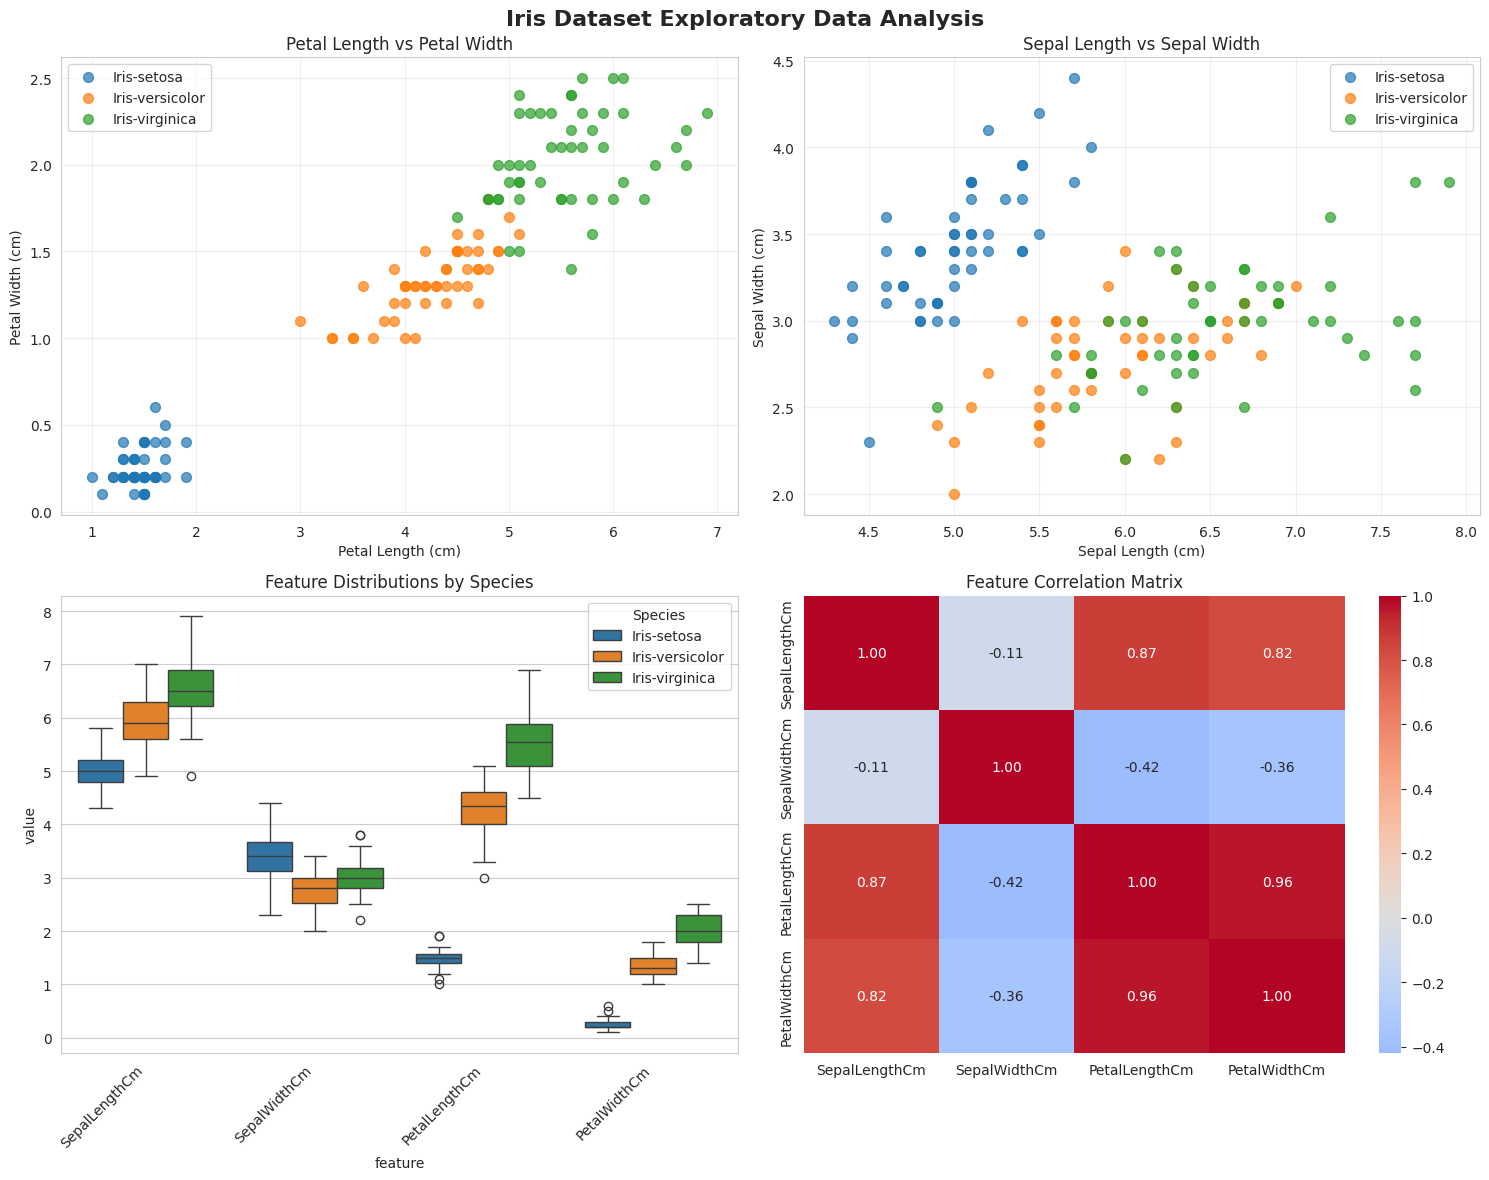

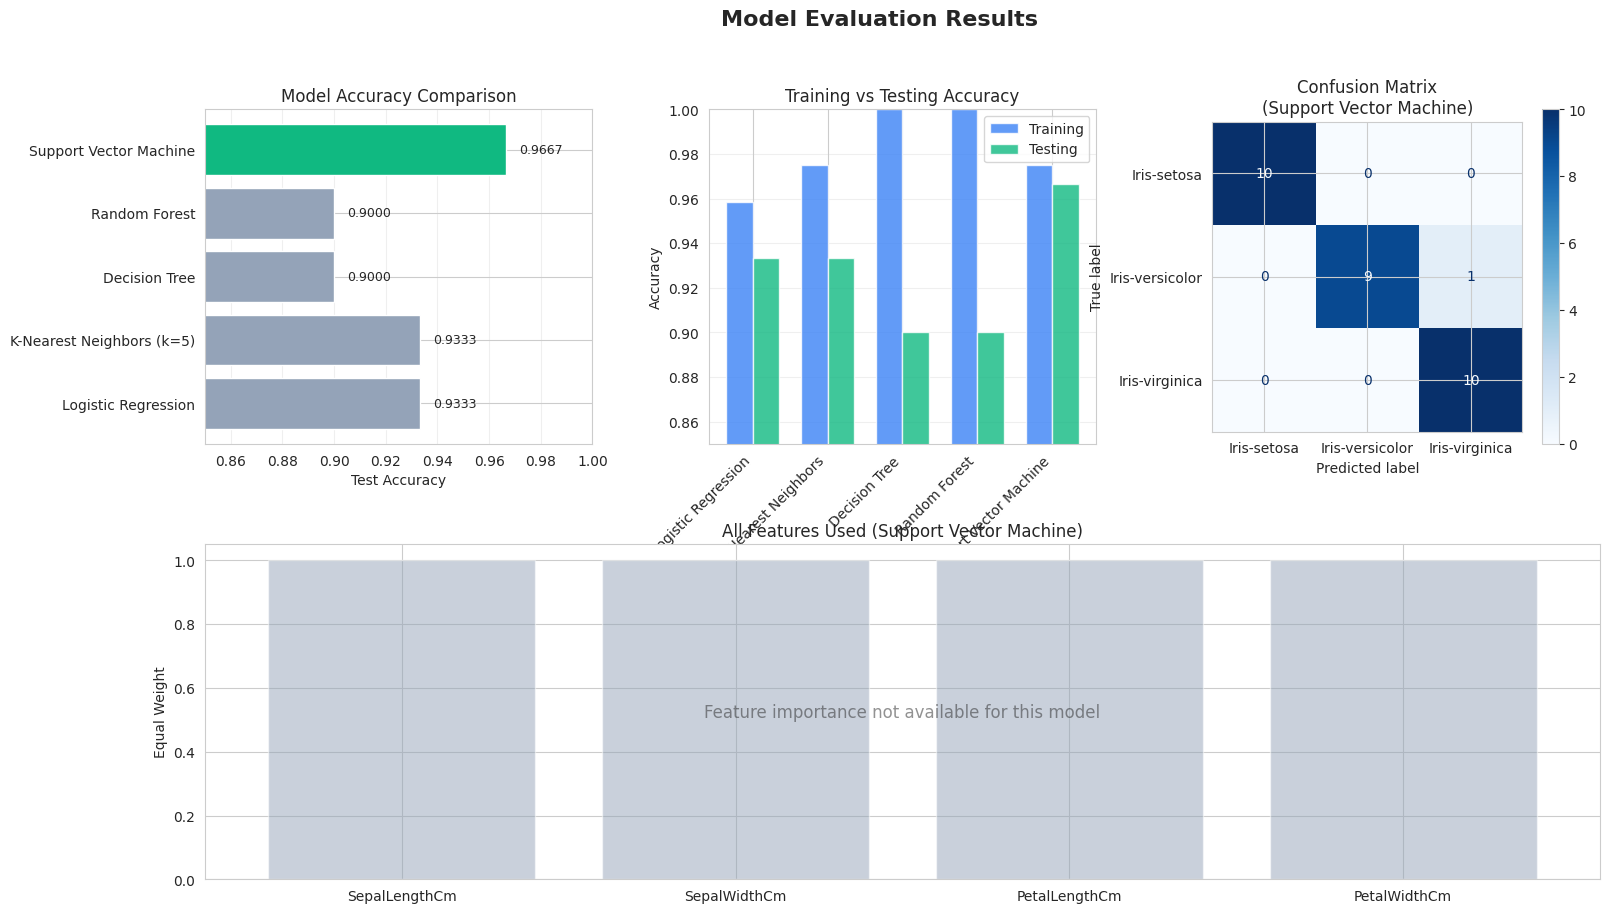

In [5]:
# ============================================
# 1. LOAD AND EXPLORE THE DATASET
# ============================================

print("=" * 60)
print("IRIS FLOWER CLASSIFICATION")
print("=" * 60)

# Load the Iris CSV dataset
# Expected columns: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
try:
    df = pd.read_csv('/content/Iris.csv')
    print("\n✓ Successfully loaded Iris.csv")
except FileNotFoundError:
    print("\n✗ Error: Iris.csv not found in the current directory!")
    print("Please make sure the file is in the same folder as this script.")
    exit()

print("\n1. DATASET OVERVIEW")
print("-" * 60)
print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {len(df)}")
print(f"Column names: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

print("\n2. DATA INFORMATION")
print("-" * 60)
print(df.info())

print("\n3. STATISTICAL SUMMARY")
print("-" * 60)
print(df.describe())

print("\n4. MISSING VALUES CHECK")
print("-" * 60)
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✓ No missing values found")
else:
    print("⚠ Missing values detected! Cleaning data...")
    df = df.dropna()

print("\n5. CLASS DISTRIBUTION")
print("-" * 60)
print(df['Species'].value_counts())

# ============================================
# 2. DATA PREPROCESSING
# ============================================

print("\n6. DATA PREPROCESSING")
print("-" * 60)

# Separate features and target
# Drop the 'Id' column as it's not a feature
if 'Id' in df.columns:
    feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
else:
    # If no Id column, use all numeric columns except Species
    feature_columns = df.select_dtypes(include=[np.number]).columns.tolist()

X = df[feature_columns].values
y = df['Species'].values

# Encode the species labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
species_names = label_encoder.classes_

print(f"Features: {feature_columns}")
print(f"Target classes: {species_names}")
print(f"Encoded as: {dict(zip(species_names, range(len(species_names))))}")

# ============================================
# 3. DATA VISUALIZATION
# ============================================

print("\n7. GENERATING VISUALIZATIONS...")
print("-" * 60)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Petal Length vs Petal Width
ax1 = plt.subplot(2, 2, 1)
for species in species_names:
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['PetalLengthCm'],
                species_data['PetalWidthCm'],
                label=species, alpha=0.7, s=50)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Sepal Length vs Sepal Width
ax2 = plt.subplot(2, 2, 2)
for species in species_names:
    species_data = df[df['Species'] == species]
    plt.scatter(species_data['SepalLengthCm'],
                species_data['SepalWidthCm'],
                label=species, alpha=0.7, s=50)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Feature distributions
ax3 = plt.subplot(2, 2, 3)
df_melted = df[feature_columns + ['Species']].melt(id_vars='Species', var_name='feature', value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value', hue='Species', ax=ax3)
plt.xticks(rotation=45, ha='right')
plt.title('Feature Distributions by Species')
plt.tight_layout()

# Plot 4: Correlation heatmap
ax4 = plt.subplot(2, 2, 4)
correlation_matrix = df[feature_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4, fmt='.2f')
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.savefig('iris_eda.png', dpi=300, bbox_inches='tight')
print("✓ EDA plots saved as 'iris_eda.png'")

# ============================================
# 4. DATA PREPARATION FOR MODELING
# ============================================

print("\n8. PREPARING DATA FOR MODELING")
print("-" * 60)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set size: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set size: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Feature Scaling (normalize the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")
print(f"  Mean: {scaler.mean_}")
print(f"  Std: {scaler.scale_}")

# ============================================
# 5. MODEL TRAINING AND EVALUATION
# ============================================

print("\n9. TRAINING MULTIPLE MODELS")
print("-" * 60)

# Dictionary to store models and their results
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'K-Nearest Neighbors (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42, probability=True)
}

results = {}
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'predictions': y_pred_test
    }
    trained_models[name] = model

    print(f"  Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"  Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# ============================================
# 6. DETAILED EVALUATION OF BEST MODEL
# ============================================

print("\n10. DETAILED EVALUATION")
print("-" * 60)

# Find the best model based on test accuracy
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
best_model = trained_models[best_model_name]
best_predictions = results[best_model_name]['predictions']

print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_predictions, target_names=species_names))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
print("\nConfusion Matrix:")
print(cm)
print("\nInterpretation:")
for i, species in enumerate(species_names):
    correctly_classified = cm[i, i]
    total = cm[i].sum()
    print(f"  {species}: {correctly_classified}/{total} correctly classified ({correctly_classified/total*100:.1f}%)")

# ============================================
# 7. VISUALIZE RESULTS
# ============================================

print("\n11. GENERATING RESULT VISUALIZATIONS...")
print("-" * 60)

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
fig.suptitle('Model Evaluation Results', fontsize=16, fontweight='bold')

# Plot 1: Model Comparison (Test Accuracy)
ax1 = fig.add_subplot(gs[0, 0])
model_names = list(results.keys())
test_accuracies = [results[name]['test_accuracy'] for name in model_names]
colors = ['#10b981' if name == best_model_name else '#94a3b8' for name in model_names]
bars = ax1.barh(model_names, test_accuracies, color=colors)
ax1.set_xlabel('Test Accuracy')
ax1.set_title('Model Accuracy Comparison')
ax1.set_xlim([0.85, 1.0])
for i, (bar, acc) in enumerate(zip(bars, test_accuracies)):
    ax1.text(acc + 0.005, i, f'{acc:.4f}', va='center', fontsize=9)
ax1.grid(True, alpha=0.3, axis='x')

# Plot 2: Training vs Testing Accuracy
ax2 = fig.add_subplot(gs[0, 1])
x_pos = np.arange(len(model_names))
train_accs = [results[name]['train_accuracy'] for name in model_names]
test_accs = [results[name]['test_accuracy'] for name in model_names]
width = 0.35
ax2.bar(x_pos - width/2, train_accs, width, label='Training', color='#3b82f6', alpha=0.8)
ax2.bar(x_pos + width/2, test_accs, width, label='Testing', color='#10b981', alpha=0.8)
ax2.set_xlabel('Models')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training vs Testing Accuracy')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([name.split('(')[0].strip() for name in model_names], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([0.85, 1.0])

# Plot 3: Confusion Matrix
ax3 = fig.add_subplot(gs[0, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_names)
disp.plot(ax=ax3, cmap='Blues', values_format='d')
ax3.set_title(f'Confusion Matrix\n({best_model_name})')

# Plot 4: Feature Importance or Coefficients
ax4 = fig.add_subplot(gs[1, :])
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    ax4.bar(range(len(importances)), importances[indices], color='#8b5cf6', alpha=0.8)
    ax4.set_xticks(range(len(importances)))
    ax4.set_xticklabels([feature_columns[i] for i in indices])
    ax4.set_ylabel('Importance')
    ax4.set_title(f'Feature Importance ({best_model_name})')
    ax4.grid(True, alpha=0.3, axis='y')
elif hasattr(best_model, 'coef_'):
    importances = np.mean(np.abs(best_model.coef_), axis=0)
    indices = np.argsort(importances)[::-1]
    ax4.bar(range(len(importances)), importances[indices], color='#8b5cf6', alpha=0.8)
    ax4.set_xticks(range(len(importances)))
    ax4.set_xticklabels([feature_columns[i] for i in indices])
    ax4.set_ylabel('Coefficient Magnitude')
    ax4.set_title(f'Feature Coefficient Magnitude ({best_model_name})')
    ax4.grid(True, alpha=0.3, axis='y')
else:
    # For models without feature importance, show all features equally
    ax4.bar(range(len(feature_columns)), [1]*len(feature_columns), color='#94a3b8', alpha=0.5)
    ax4.set_xticks(range(len(feature_columns)))
    ax4.set_xticklabels(feature_columns)
    ax4.set_ylabel('Equal Weight')
    ax4.set_title(f'All Features Used ({best_model_name})')
    ax4.text(0.5, 0.5, 'Feature importance not available for this model',
            ha='center', va='center', transform=ax4.transAxes, fontsize=12, alpha=0.5)

plt.savefig('iris_results.png', dpi=300, bbox_inches='tight')
print("✓ Results plots saved as 'iris_results.png'")

# ============================================
# 8. MAKE PREDICTIONS ON NEW DATA
# ============================================

print("\n12. MAKING PREDICTIONS ON NEW DATA")
print("-" * 60)

# Example: Predict species for new flower measurements
new_flowers = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Should be Setosa
    [6.2, 2.9, 4.3, 1.3],  # Should be Versicolor
    [7.3, 2.9, 6.3, 1.8]   # Should be Virginica
])

# Scale the new data
new_flowers_scaled = scaler.transform(new_flowers)

# Make predictions using the best model
predictions = best_model.predict(new_flowers_scaled)
prediction_proba = best_model.predict_proba(new_flowers_scaled)

print("\nPredictions for new samples:")
for i, (flower, pred, proba) in enumerate(zip(new_flowers, predictions, prediction_proba)):
    print(f"\nSample {i+1}: Sepal[{flower[0]}, {flower[1]}] Petal[{flower[2]}, {flower[3]}]")
    print(f"  Predicted Species: {species_names[pred]}")
    print(f"  Confidence:")
    for j, species in enumerate(species_names):
        print(f"    {species}: {proba[j]*100:.2f}%")

# ============================================
# 9. SAVE THE BEST MODEL (OPTIONAL)
# ============================================

print("\n13. MODEL SAVING")
print("-" * 60)

try:
    import joblib

    # Save the model and scaler
    joblib.dump(best_model, 'best_iris_model.pkl')
    joblib.dump(scaler, 'iris_scaler.pkl')
    joblib.dump(label_encoder, 'iris_label_encoder.pkl')

    print("✓ Best model saved as 'best_iris_model.pkl'")
    print("✓ Scaler saved as 'iris_scaler.pkl'")
    print("✓ Label encoder saved as 'iris_label_encoder.pkl'")
    print("\nTo load and use the model later:")
    print("  model = joblib.load('best_iris_model.pkl')")
    print("  scaler = joblib.load('iris_scaler.pkl')")
    print("  label_encoder = joblib.load('iris_label_encoder.pkl')")
except ImportError:
    print("⚠ joblib not installed. Install with: pip install joblib")
    print("  (Model saving skipped)")

# ============================================
# 10. KEY INSIGHTS
# ============================================

print("\n" + "=" * 60)
print("KEY INSIGHTS")
print("=" * 60)

# Calculate which features are most correlated with species
feature_correlations = []
for i, feature in enumerate(feature_columns):
    corr = abs(np.corrcoef(X[:, i], y_encoded)[0, 1])
    feature_correlations.append((feature, corr))
feature_correlations.sort(key=lambda x: x[1], reverse=True)

insights = [
    f"✓ Dataset contains {len(df)} samples across {len(species_names)} species",
    f"✓ Best performing model: {best_model_name}",
    f"✓ Test accuracy achieved: {results[best_model_name]['test_accuracy']*100:.2f}%",
    f"✓ Most predictive feature: {feature_correlations[0][0]}",
    f"✓ Least predictive feature: {feature_correlations[-1][0]}",
    "✓ All models performed well, indicating well-separated classes",
    "✓ Petal measurements generally more discriminative than sepal measurements"
]

for insight in insights:
    print(insight)

print("\n" + "=" * 60)
print("CLASSIFICATION COMPLETE!")
print("=" * 60)
print("\nGenerated files:")
print("  - iris_eda.png: Exploratory data analysis visualizations")
print("  - iris_results.png: Model performance and evaluation")
print("  - best_iris_model.pkl: Trained model (if joblib available)")
print("  - iris_scaler.pkl: Feature scaler (if joblib available)")
print("  - iris_label_encoder.pkl: Label encoder (if joblib available)")
print("=" * 60)